# Keras  Basics

![keras](https://ekababisong.org/assets/demyst_dl/neural-network.jpg)

- Missing value ile islemir
- Categorical qebul etmir
- Outlier sensitvedir.

https://www.youtube.com/watch?v=6M5VXKLf4D4

### Load the Data

In [1]:
import pandas as pd
import s eaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,target,feature_1,feature_2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


<AxesSubplot:>

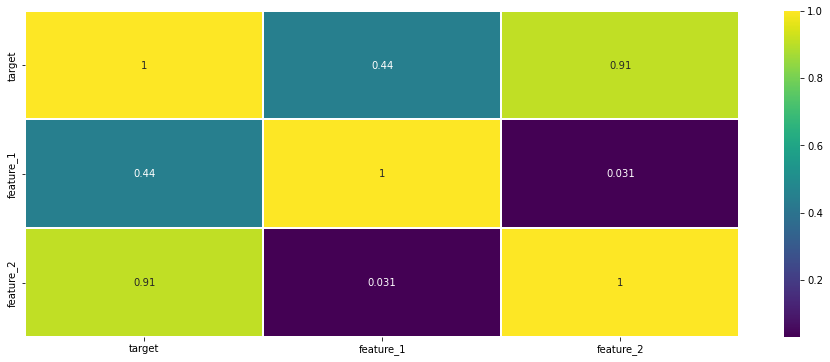

In [11]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,cmap='viridis')

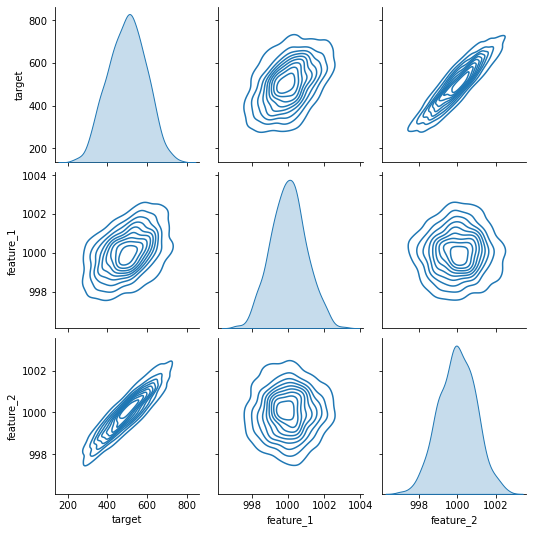

In [18]:
sns.pairplot(df, kind="kde")

### Test/Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Features
X = df[['feature_1','feature_2']].values

# Label
y = df['target'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
X_train.shape

(700, 2)

In [22]:
X_test.shape

(300, 2)

## Scaling Data

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train)

MinMaxScaler()

In [26]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.

## Creating a Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [17]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [18]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [19]:
# 3 layer and 4 units each

# RELU
![image](https://miro.medium.com/v2/resize:fit:1200/1*ZafDv3VUm60Eh10OeJu1vw.png)


In [20]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [21]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256593.8906
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256414.0625
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256222.0781
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256043.7656
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255863.5625
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255664.1406
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255446.2188
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255207.8594
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254920.6875
Epoch 10/250
22/22 [==============================] - 0s 902us/step - loss: 254567.2188
Epoch 11/250
22/22 [==============================] - 0s 963us/step - loss: 254184.3906
Epoch 12/250
22/22 [==============================] - 0s 1m

22/22 [==============================] - 0s 978us/step - loss: 24.2419
Epoch 193/250
22/22 [==============================] - 0s 995us/step - loss: 24.4721
Epoch 194/250
22/22 [==============================] - 0s 887us/step - loss: 24.1841
Epoch 195/250
22/22 [==============================] - 0s 907us/step - loss: 24.4281
Epoch 196/250
22/22 [==============================] - 0s 956us/step - loss: 24.8367
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 23.8514
Epoch 198/250
22/22 [==============================] - 0s 932us/step - loss: 24.6055
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5911
Epoch 200/250
22/22 [==============================] - 0s 906us/step - loss: 24.0990
Epoch 201/250
22/22 [==============================] - 0s 945us/step - loss: 24.4740
Epoch 202/250
22/22 [==============================] - 0s 982us/step - loss: 24.9721
Epoch 203/250
22/22 [==============================] - 0s 869us/step - loss: 24.104

## Evaluation


In [22]:
model.history.history

{'loss': [256593.890625,
  256414.0625,
  256222.078125,
  256043.765625,
  255863.5625,
  255664.140625,
  255446.21875,
  255207.859375,
  254920.6875,
  254567.21875,
  254184.390625,
  253759.5,
  253288.015625,
  252767.546875,
  252180.78125,
  251521.421875,
  250772.109375,
  249920.609375,
  248960.0,
  247900.0,
  246716.921875,
  245421.1875,
  244003.71875,
  242457.828125,
  240767.265625,
  238934.859375,
  236943.640625,
  234790.28125,
  232466.28125,
  229972.4375,
  227292.734375,
  224420.109375,
  221361.0,
  218095.890625,
  214628.796875,
  210934.703125,
  207041.234375,
  202917.421875,
  198562.96875,
  193995.109375,
  189204.5625,
  184174.0625,
  178916.0,
  173450.109375,
  167740.40625,
  161809.5625,
  155687.765625,
  149367.765625,
  142831.84375,
  136140.46875,
  129284.375,
  122253.2890625,
  115070.7734375,
  107826.265625,
  100422.609375,
  93029.2421875,
  85592.65625,
  78151.359375,
  70772.8203125,
  63507.6953125,
  56349.47265625,
  49345.6

In [23]:
loss = model.history.history['loss']

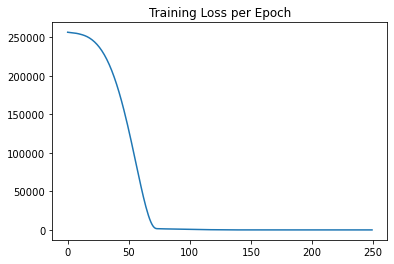

In [24]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### MSE on training set and test set.


In [25]:
model.metrics_names

['loss']

In [26]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [27]:
training_score

25.23372459411621

In [28]:
test_score

25.55463981628418

###  Evaluations

In [29]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [30]:
test_predictions

array([[404.4885 ],
       [622.51184],
       [591.138  ],
       [571.2487 ],
       [365.84973],
       [578.1967 ],
       [514.1319 ],
       [458.25293],
       [548.2916 ],
       [446.6776 ],
       [610.77045],
       [548.0012 ],
       [418.284  ],
       [408.06357],
       [650.19147],
       [436.4666 ],
       [507.54895],
       [658.86127],
       [661.5133 ],
       [564.57245],
       [333.4973 ],
       [443.99142],
       [381.74683],
       [377.98172],
       [565.62634],
       [609.57513],
       [531.457  ],
       [427.03638],
       [654.3802 ],
       [413.27362],
       [441.79868],
       [484.24414],
       [437.57947],
       [680.75775],
       [423.9405 ],
       [416.86993],
       [501.03235],
       [549.5243 ],
       [508.81976],
       [394.56104],
       [617.57025],
       [415.81738],
       [603.44293],
       [445.121  ],
       [501.0878 ],
       [580.73834],
       [667.9312 ],
       [489.51587],
       [317.87067],
       [484.54272],


In [31]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [32]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [33]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [34]:
test_predictions

0      404.488495
1      622.511841
2      591.138000
3      571.248718
4      365.849731
          ...    
295    528.112793
296    514.406616
297    608.638977
298    416.144409
299    410.066589
Length: 300, dtype: float32

In [35]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [36]:
pred_df.columns = ['Test Y','Model Predictions']

In [37]:
pred_df

,Test Y,Model Predictions
0,402.296319,404.488495
1,624.156198,622.511841
2,582.455066,591.138000
3,578.588606,571.248718
4,371.224104,365.849731
...,...,...
295,525.704657,528.112793
296,502.909473,514.406616
297,612.727910,608.638977
298,417.569725,416.144409


Let's compare to the real test labels!

<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

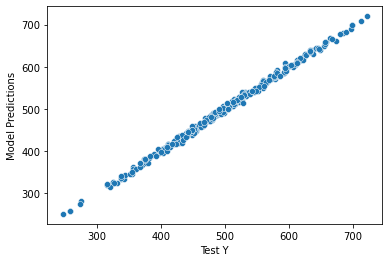

In [38]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [39]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

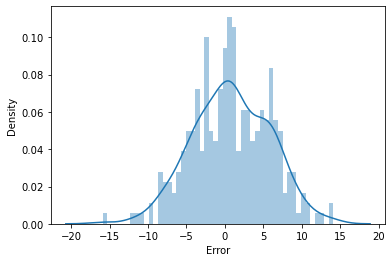

In [40]:
sns.distplot(pred_df['Error'],bins=50)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.049277522245223

In [43]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.55464475506757

In [44]:
# Essentially the same thing, difference just due to precision
test_score

25.55463981628418

In [45]:
#RMSE
test_score**0.5

5.05515972213383

# Predicting on new data

In [46]:
# [[Feature_1, Feature_2]]
new_data_sample = [[999,999]]

In [47]:
# scale
scaler.transform(new_data_sample)

array([[0.30608328, 0.36005236]])

In [48]:
new_data_sample = scaler.transform(new_data_sample)

In [49]:
model.predict(new_data_sample)

1/1 [==============================] - 0s 17ms/step


array([[370.37274]], dtype=float32)

## Saving and Loading a Model

In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save('my_model.h5') 

C:\Users\005467\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
later_model = load_model('my_model.h5')

In [53]:
later_model.predict(new_data_sample)

1/1 [==============================] - 0s 40ms/step


array([[370.37274]], dtype=float32)